## Problem Description

##### A customer churn machine learning prediction model which will help reduce customer attrition, enhance customer loyalty and ensure Connecttel maintains a solid edge in the highly dynamic & competitive telecommunication industry. 

## Import Libraries 

In [1]:
# Data Manipulation & Analysis
import numpy as np
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Classifier Libraries 
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix 

import warnings 
warnings.filterwarnings("ignore")

## Data Extraction 

In [2]:
# Extract and read the dataset file 

df=pd.read_csv(r"C:\Users\shopinverse\Documents\Python Datasets\Connecttel-Customer-Churn.csv")

In [3]:
# Display the first five rows of the dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display the bottom five rows of the dataset

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# View the shape of the dataset in matrix form 

df.shape

(7043, 21)

There are 7,043 observations and 21 features in the dataset. 

In [6]:
# Display the characteristics and datatype of each feature 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


A quick glance on the dataset shows there are no missing values. However, a closer look on the datatype for each feature reveals the TotalCharges feature datatype is object and not float64. This will have to be corrected inorder not to mislead my ML model. 

## Data Pre-Processing 

In [7]:
# Handling null/blank values in the TotalCharges feature 

df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [8]:
# Finding missing data in the dataset 

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no missing values or data in the dataframe. 

In [9]:
# Handling duplicate data
print(df.duplicated().sum())

0


There are no duplicate data in the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Replace non-numeric values with NaN in the dataframe

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' feature to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [12]:
# Replace the missing values in the TotalCharges column with the mean of the existing values

df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


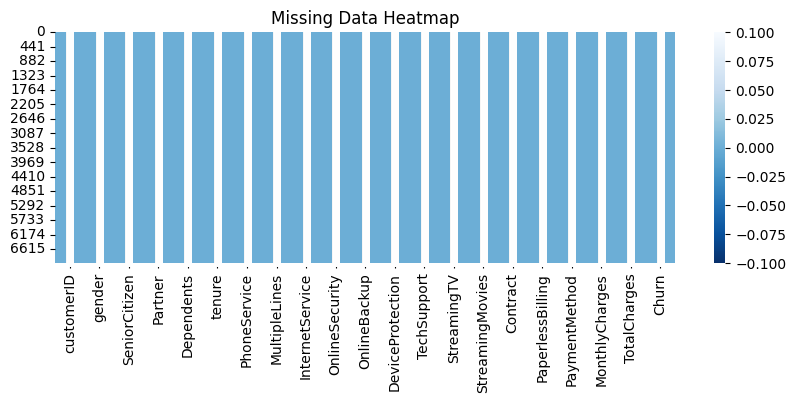

In [16]:
# Visualizing missing values 

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), annot=True, cmap='Blues_r')
plt.title('Missing Data Heatmap')
plt.show();

Heatmap confirmation of no missing values or data in the dataframe.

In [17]:
# Statistical distribution 

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Looking at the statistical distribution for MonthlyCharges the difference betwwen the mean and 50% quartile is relatively small compared to the difference in TotalCharges where the difference in both is quite large. The boxplot chart in my EDA will assist to reveal more insights in both features.

## Exploratory Data Analysis (EDA)

### Univariate Data Analysis 

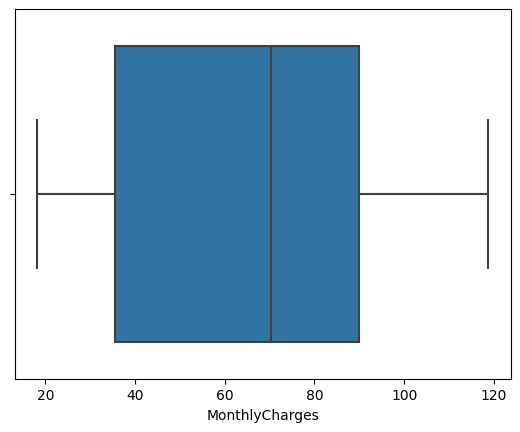

In [18]:
# Checking for Outliers in the MonthlyCharges feature.

sns.boxplot(x=df['MonthlyCharges']);

From the boxplot above, the median monthlycharge is =N=70 while the lower(25%) and upper(75%) quartile monthlycharge of the dataframe are =N=35 and =N=90. Additionally, the minimum and maximum monthlycharges are =N=18 and =N=119. 

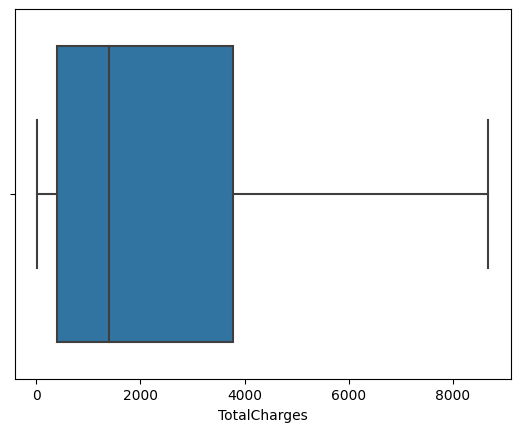

In [19]:
# Checking for Outliers in the TotalCharges feature.

sns.boxplot(x=df['TotalCharges']);

From the boxplot above, the median Totalcharge is =N=1,400 while the lower(25%) and upper(75%) quartile Totalcharge of the dataframe are =N=400 and =N=3,800. Additionally, the minimum and maximum Totalcharges are =N=18 and =N=8,600.

In [20]:
# Counting & printing the total Churn category in the dataframe.

print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


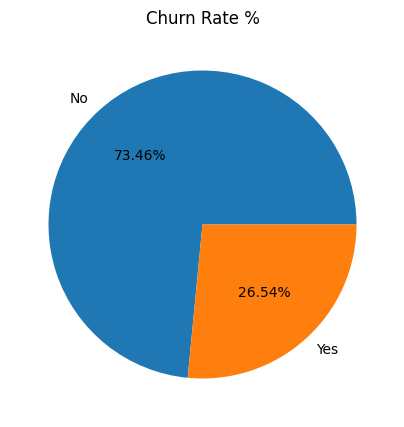

In [21]:
# Visualizing Churn feature in terms of Percentage distribution. 
from collections import Counter

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Churn Rate %");

The pie chart above shows the Churn rate is presently at 26.54%, representing phoneline customers whose subscription are inactive or who have cancelled their service while 73.46% represent phoneline customers whose subscription are active or who have not cancelled their service. 

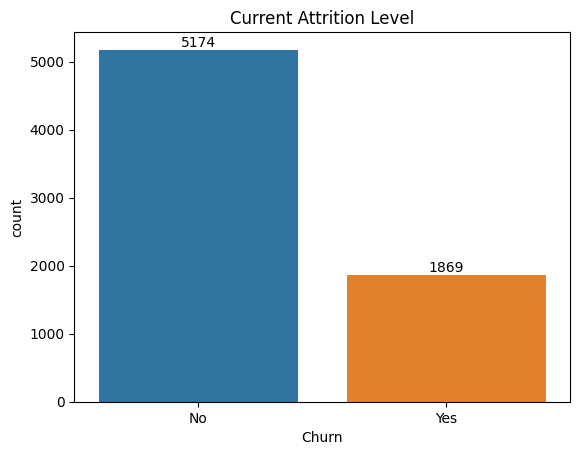

In [24]:
# Visualizing Churn feature in terms of bar distribution. 

ax=sns.countplot(x=df["Churn"], order=df["Churn"].value_counts(ascending=False).index)
values=df["Churn"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Current Attrition Level");

The bar chart above shows the current attrition level at Connecttel. Out of a total of 7,043 subscribers, about 1,869 subscribers representing 27% are already churned (that is, subscribers whose lines are inactive or have cancelled their service) while the remaining 5,174 subscribers representing 74% are active clients who have not cancelled their service. 

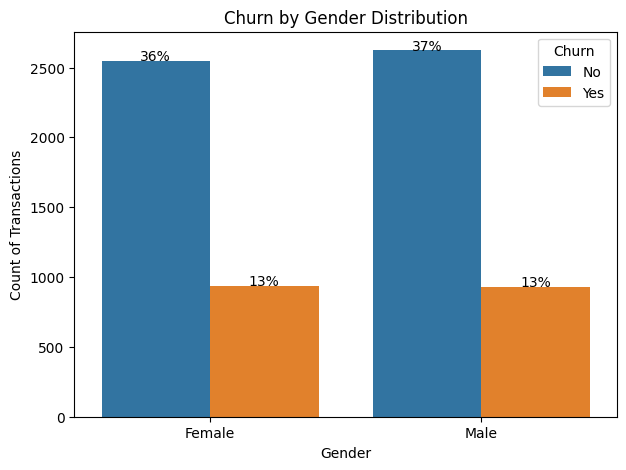

In [26]:
# Investigating churn by gender distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count of Transactions')
plt.title('Churn by Gender Distribution')

# Add percentages to the bars
total_counts = len(df['gender'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

This chart shows attrition distribution by gender.  Notice the global churn rate of 27% is evenly split between male and female subscribers at 13% each. 


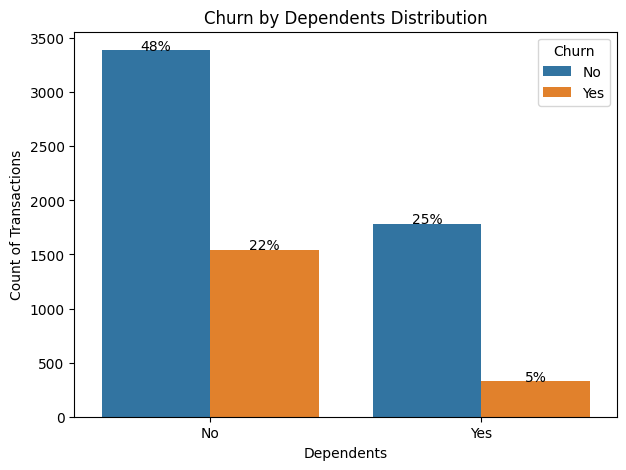

In [27]:
# Investigating churn by Dependents distribution.

plt.figure(figsize=(7,5))
ax=sns.countplot(x='Dependents', data=df, hue='Churn')
plt.xlabel('Dependents')
plt.ylabel('Count of Transactions')
plt.title('Churn by Dependents Distribution')

# Add percentages to the bars
total_counts = len(df['Dependents'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
plt.show();

The above viz illustrates the Dependents distribution by churn status. Subscribers who have dependents have churned at a lesser rate of 5% compared to subscribers with no dependents at 22%. 

In [28]:
# Function that groups the SeniorCitizen feature into two groups. 

def senior (x):
    if x == 1:
        return 'Senior Citizen'
    else:
        return 'Not Senior Citizen'

# Creates new feature SeniorCitizen Group.
df['SeniorCitizen_Group']=df['SeniorCitizen'].apply(senior)

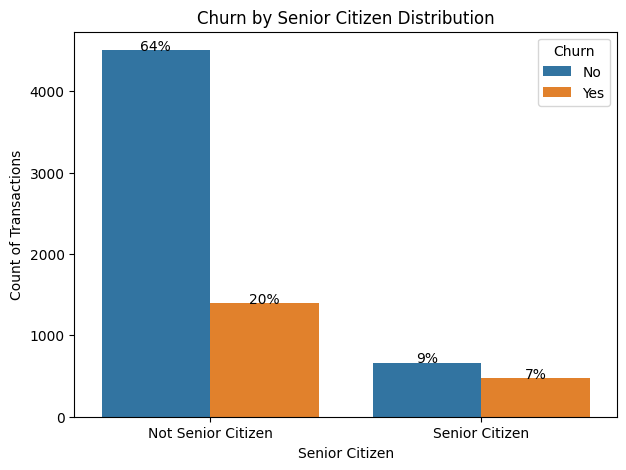

In [29]:
# Investigating churn by senior citizen distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='SeniorCitizen_Group', data=df, hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count of Transactions')
plt.title('Churn by Senior Citizen Distribution')

# Add percentages to the bars
total_counts = len(df['SeniorCitizen_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above countplot char depicts the relationship between Senior & Not Senior Citizen subscribers by churn. Notice the bulk of the churn at Connecttel is in the not Senior Citizens category with 20% of the total churn while the Senior Citizens group accounted for just 7% of the total churn. This means subscribers in the not senior citizens category are cancelling their subscriptions more than subscribers in the senior citizen category.

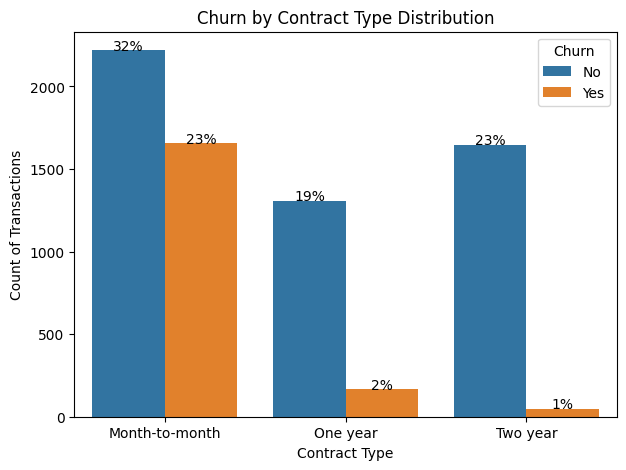

In [30]:
# Investigating churn by contract type distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count of Transactions')
plt.title('Churn by Contract Type Distribution')

# Add percentages to the bars
total_counts = len(df['Contract'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above visualization is a countplot showing the various contract types offered by Connecttel and their associated churn status. Notice the contract type with the highest churn rate is the Month-to-Month contract type with 23% while the other two are insignificant at 2% and 1% respectively. This shows that more subscribers on the Month-to-Month plan are cancelling their subscriptions compared to the other contract types.  

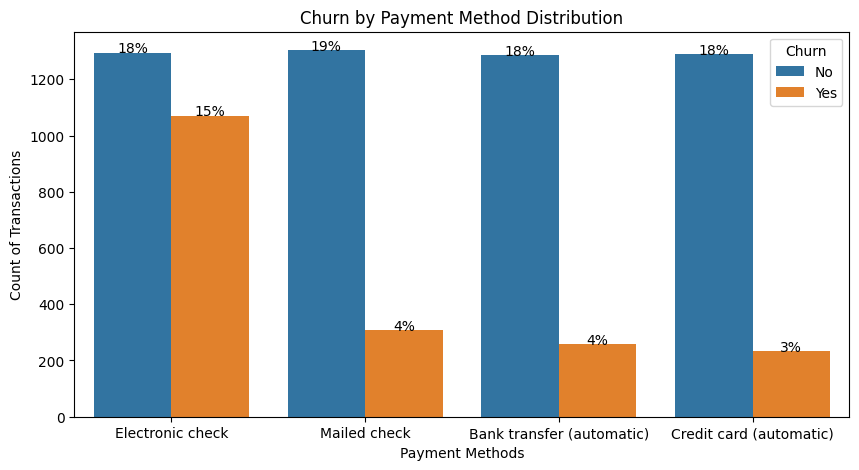

In [31]:
# Investigating churn by Payment Method distribution.

# Create countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('Payment Methods')
plt.ylabel('Count of Transactions')
plt.title('Churn by Payment Method Distribution')

# Add percentages to the bars
total_counts = len(df['PaymentMethod'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The chart above shows the payment method distribution at Connecttel by churn status. The payment method with the highest churn rate is Electronic Check at 15% followed by Mailed check at 4%, Bank transfer at 4% and credit card with the least at 3%. This clearly shows that Connecttel subscribers who use Electronic Check are dropping off and not using the channel to either complete or renew their subscriptions. 

<Figure size 1000x500 with 0 Axes>

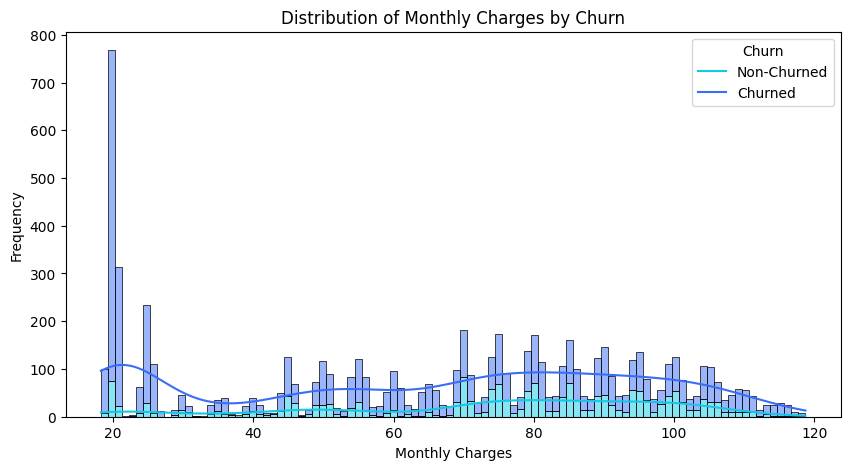

In [32]:
# Visualizing Monthlycharges distribution by churn.

# Choose a color palette
palette = 'rainbow'

plt.figure(figsize=(10, 5))

# Set the color palette
sns.set_palette(palette)

plt.figure(figsize=(10, 5))

# Add 'Churn' as a hue with custom legend labels
sns.histplot(data=df, x='MonthlyCharges', bins=100, kde=True, hue='Churn', multiple='stack')

plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# Manually set legend labels
legend_labels = ['Non-Churned', 'Churned']
plt.legend(title='Churn', labels=legend_labels, loc='upper right')

plt.show();


The chart shows distribution of monthly charges by churn. It is clearly evident that subscribers at the lower end of the spectrum recorded a higher churn count – Specifically, subscribers  who pay a monthly charge of between =N=20 and =N=25. This may be due to poor service, neglect or low product offering. 

Subscribers on higher monthly charges also recorded a moderate churn count. Specifically, subscribers that pay between =N=70 & =N=105 as charges per month. This might be as a result of over-charges, poor service or low product offering.


<Figure size 1000x500 with 0 Axes>

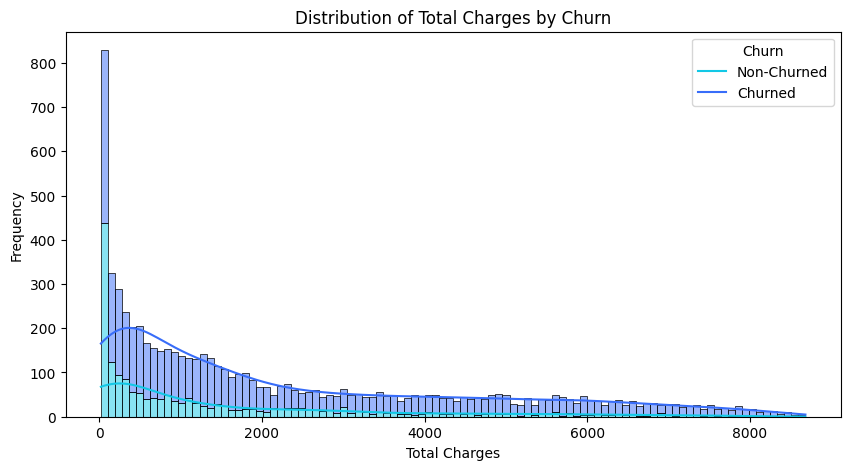

In [33]:
# Visualizing Totalcharges distribution by churn.

# Choose a color palette
palette = 'rainbow'

plt.figure(figsize=(10, 5))

# Set the color palette
sns.set_palette(palette)

plt.figure(figsize=(10, 5))

# Add 'Churn' as a hue with custom legend labels
sns.histplot(data=df, x='TotalCharges', bins=100, kde=True, hue='Churn', multiple='stack')

plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

# Manually set legend labels
legend_labels = ['Non-Churned', 'Churned']
plt.legend(title='Churn', labels=legend_labels, loc='upper right')

plt.show();

The above chart shows the distribution of Total Charges by Churn. It seems subscribers at the lower end of the spectrum are churning more than subscribers at the higher end. Specifically, subscribers that paid less than =N=2,000 in total charges. 

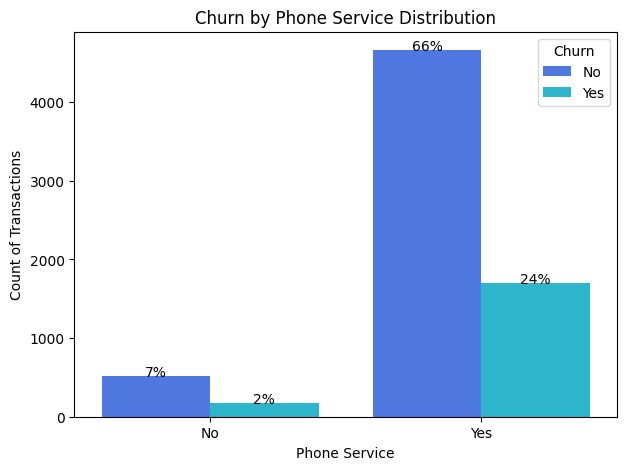

In [34]:
# Investigating Phone Service Distribution & churn. 

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count of Transactions')
plt.title('Churn by Phone Service Distribution')

# Add percentages to the bars
total_counts = len(df['PhoneService'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The above viz illustrates the phone service distribution by churn status. Subscribers with phone service are more at risk of dropping-off or cancelling their subscription with a churn rate of 24% compared to subscribers with no phone service with a churn rate of 2%. 

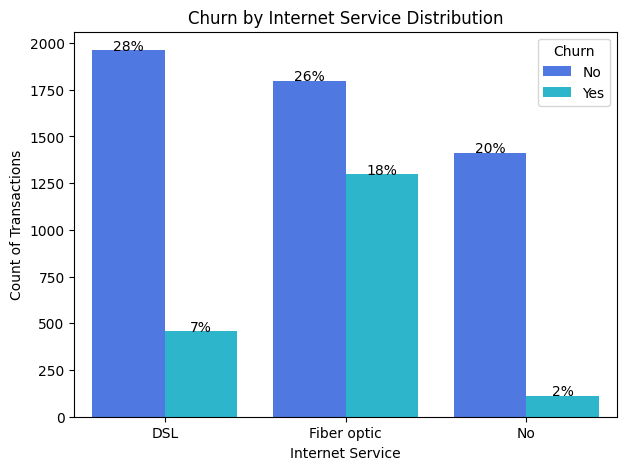

In [35]:
# Investigating churn by Internet Service distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='InternetService', data=df, hue='Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count of Transactions')
plt.title('Churn by Internet Service Distribution')

# Add percentages to the bars
total_counts = len(df['InternetService'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The chart above depicts the internet service distribution at Connecttel. The Fibre Optic service channel is clearly in distress with the highest churn rate of 18% compared to the other service channels - DSL at 7% and No internet service at 2%. 

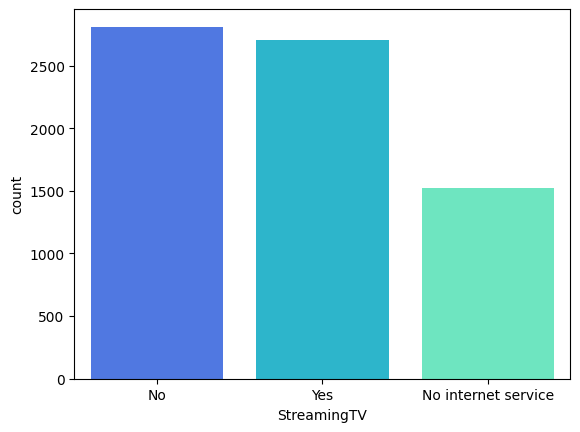

In [36]:
# Investigating the StreamingTV feature to correct the category not included in the data dictionary.
sns.countplot(x='StreamingTV', data=df);

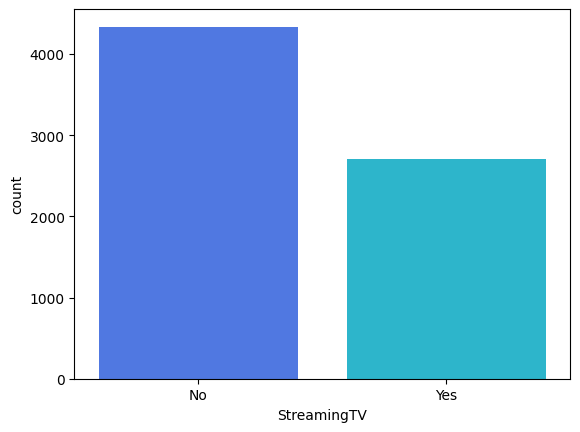

In [38]:
# displaying the error
df[df['StreamingTV']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['StreamingTV']=='No internet service', 'StreamingTV']='No'

# create the plot to display the corrected error
sns.countplot(x='StreamingTV', data=df);

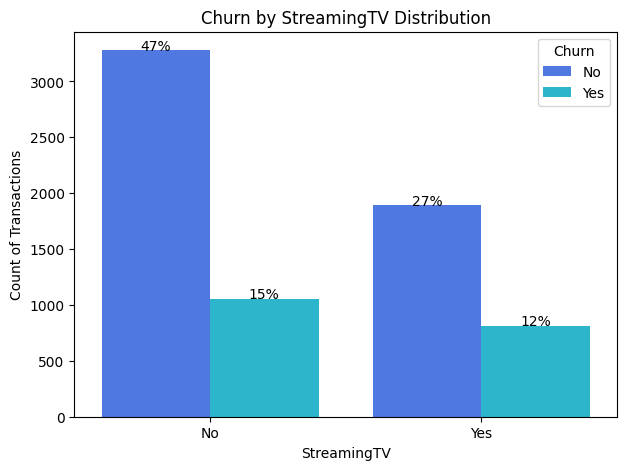

In [39]:
# Investigating churn by StreamingTV distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='StreamingTV', data=df, hue='Churn')
plt.xlabel('StreamingTV')
plt.ylabel('Count of Transactions')
plt.title('Churn by StreamingTV Distribution')

# Add percentages to the bars
total_counts = len(df['StreamingTV'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by StreamingTV distribution chart above, subscribers with and without StreamingTV options both have high churn rates at 12% and 15% respectively.

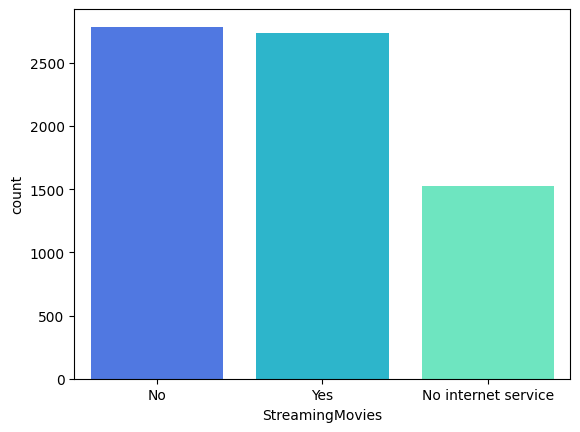

In [40]:
# Investigating the StreamingMovies feature to correct the category not included in the data dictionary.
sns.countplot(x='StreamingMovies', data=df);

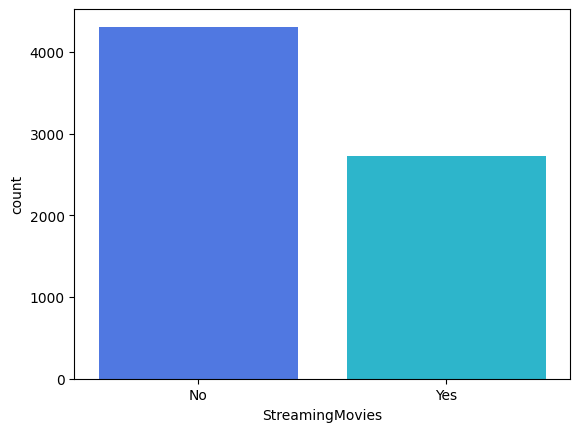

In [41]:
# displaying the error
df[df['StreamingMovies']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['StreamingMovies']=='No internet service', 'StreamingMovies']='No'

# create the plot to display the corrected error
sns.countplot(x='StreamingMovies', data=df);

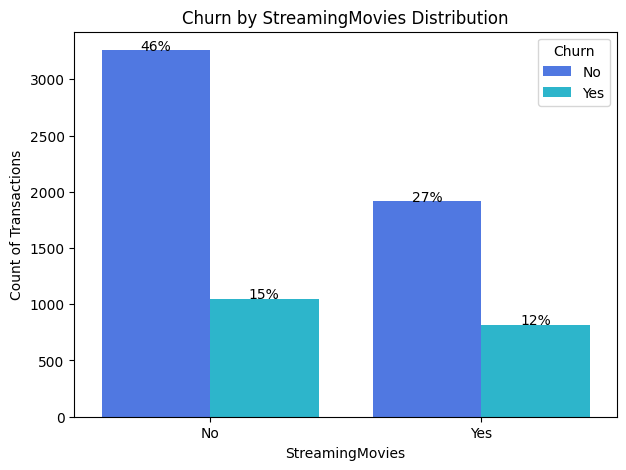

In [42]:
# Investigating churn by StreamingMovies distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='StreamingMovies', data=df, hue='Churn')
plt.xlabel('StreamingMovies')
plt.ylabel('Count of Transactions')
plt.title('Churn by StreamingMovies Distribution')

# Add percentages to the bars
total_counts = len(df['StreamingMovies'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by StreamingMovies distribution chart above, subscribers with and without StreamingMovies options both have high churn rates at 12% and 15% respectively.

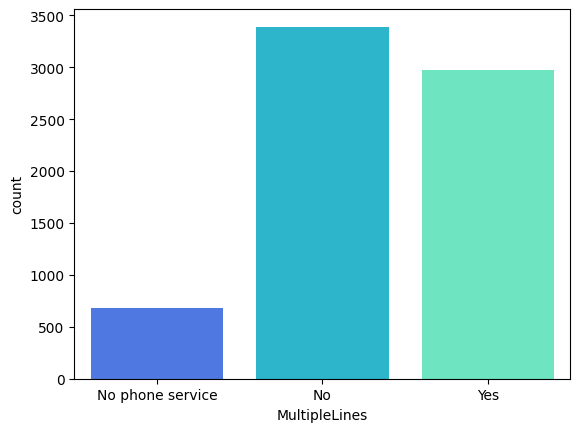

In [43]:
# Investigating the MultipleLines feature to correct the category not included in the data dictionary.
sns.countplot(x='MultipleLines', data=df);

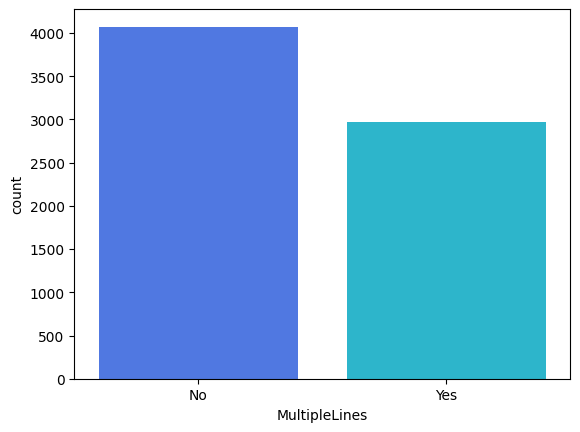

In [44]:
# displaying the error
df[df['MultipleLines']=='No phone service'].head(3)

# Correcting the error 
df.loc[df['MultipleLines']=='No phone service', 'MultipleLines']='No'

# create the plot to display the corrected error
sns.countplot(x='MultipleLines', data=df);

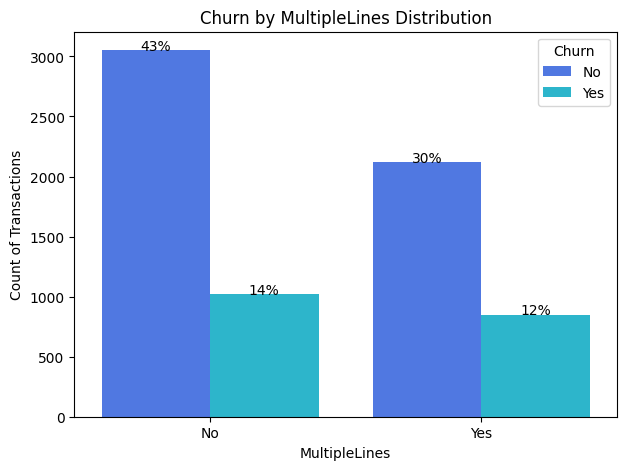

In [45]:
# Investigating churn by MultipleLines distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of Transactions')
plt.title('Churn by MultipleLines Distribution')

# Add percentages to the bars
total_counts = len(df['MultipleLines'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by MultipleLines distribution chart above, subscribers with and without StreamingMovies options both have high churn rates at 12% and 14% respectively.

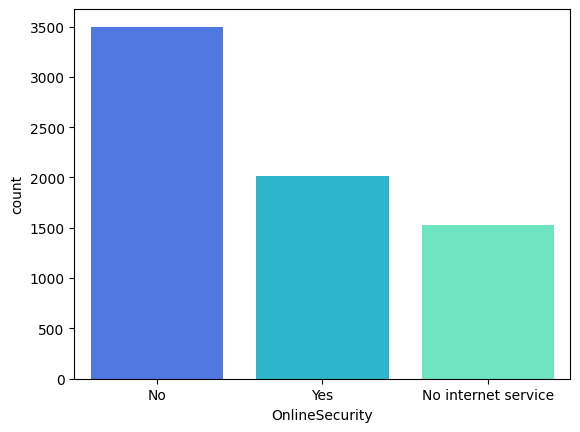

In [46]:
# Investigating the OnlineSecurity feature to correct the category not included in the data dictionary.
sns.countplot(x='OnlineSecurity', data=df);

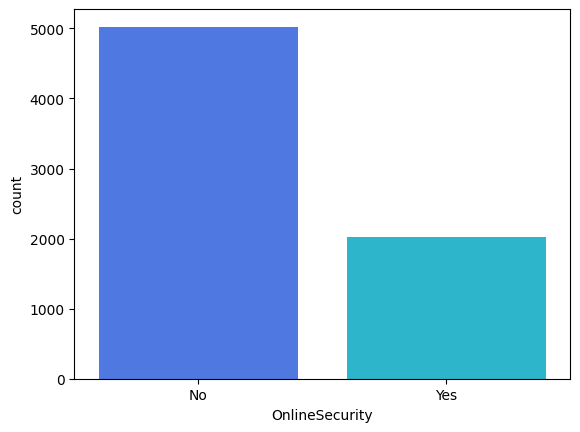

In [47]:
# displaying the error
df[df['OnlineSecurity']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['OnlineSecurity']=='No internet service', 'OnlineSecurity']='No'

# create the plot to display the corrected error
sns.countplot(x='OnlineSecurity', data=df);

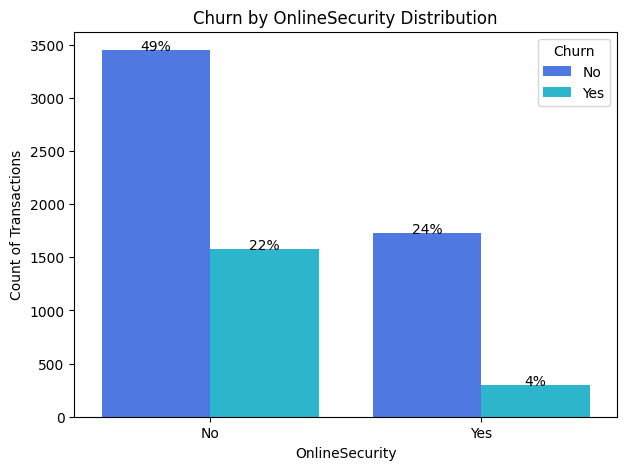

In [48]:
# Investigating churn by OnlineSecurity distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='OnlineSecurity', data=df, hue='Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count of Transactions')
plt.title('Churn by OnlineSecurity Distribution')

# Add percentages to the bars
total_counts = len(df['OnlineSecurity'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by OnlineSecurity distribution chart above, subscribers without OnlineSecurity have a higher churn rate at 12% compared to subscribers with OnlineSecurity at 4%. 

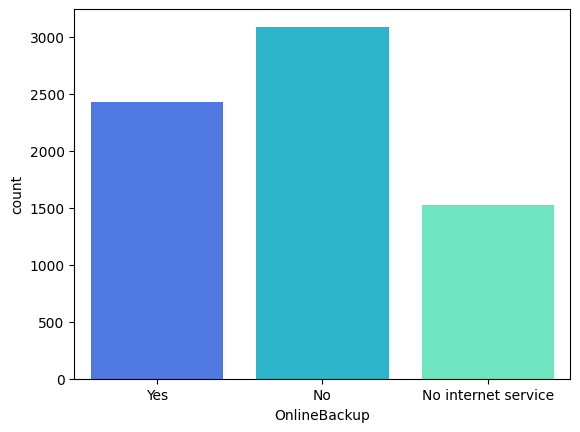

In [49]:
# Investigating the OnlineSecurity feature to correct the category not included in the data dictionary.
sns.countplot(x='OnlineBackup', data=df);

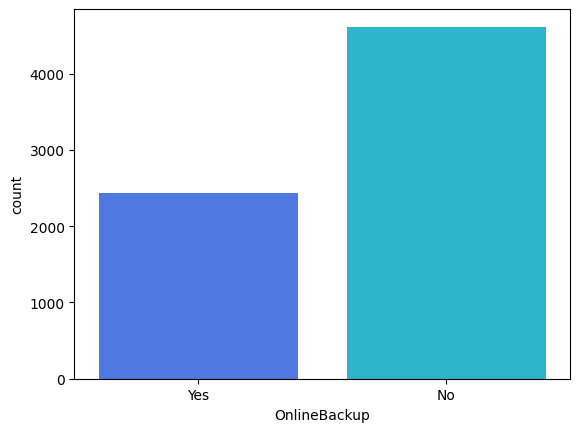

In [50]:
# displaying the error
df[df['OnlineBackup']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['OnlineBackup']=='No internet service', 'OnlineBackup']='No'

# create the plot to display the corrected error
sns.countplot(x='OnlineBackup', data=df);

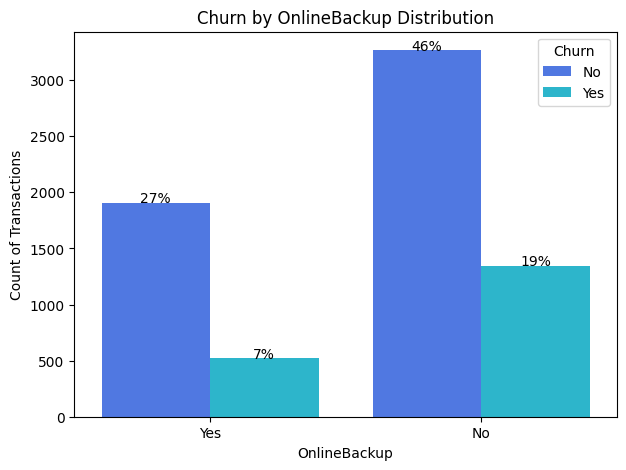

In [51]:
# Investigating churn by OnlineBackup distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='OnlineBackup', data=df, hue='Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Count of Transactions')
plt.title('Churn by OnlineBackup Distribution')

# Add percentages to the bars
total_counts = len(df['OnlineBackup'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by OnlineBackup distribution chart above, subscribers without OnlineBackup have a higher churn rate at 19% compared to subscribers with OnlineBackup at 7%.

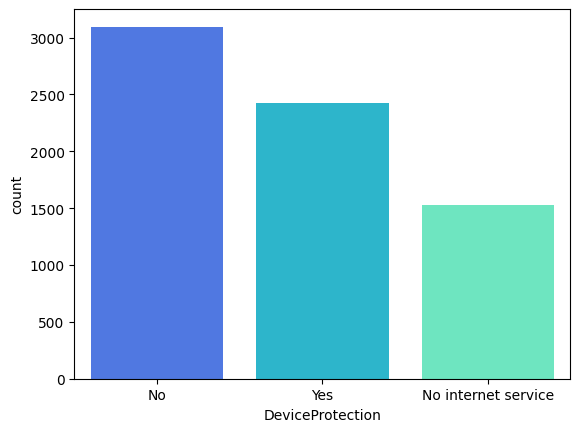

In [52]:
# Investigating the DeviceProtection feature to correct the category not included in the data dictionary.
sns.countplot(x='DeviceProtection', data=df);

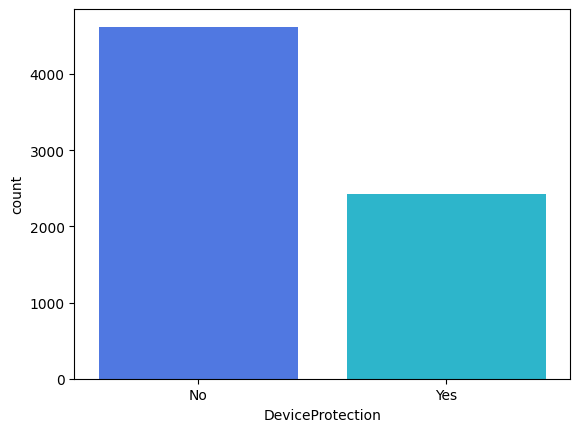

In [53]:
# displaying the error
df[df['DeviceProtection']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['DeviceProtection']=='No internet service', 'DeviceProtection']='No'

# create the plot to display the corrected error
sns.countplot(x='DeviceProtection', data=df);

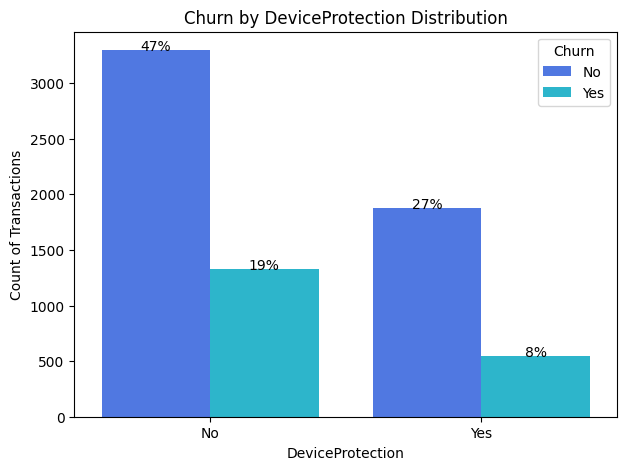

In [54]:
# Investigating churn by DeviceProtection distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='DeviceProtection', data=df, hue='Churn')
plt.xlabel('DeviceProtection')
plt.ylabel('Count of Transactions')
plt.title('Churn by DeviceProtection Distribution')

# Add percentages to the bars
total_counts = len(df['DeviceProtection'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by DeviceProtection distribution chart above, subscribers without DeviceProtection have a higher churn rate at 19% compared to subscribers with DeviceProtection at 8%.

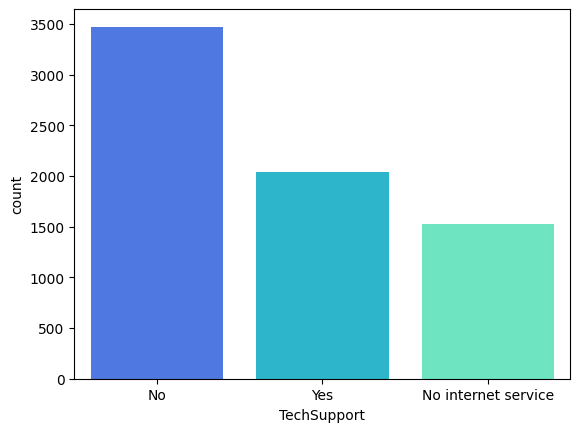

In [55]:
# Investigating the TechSupport feature to correct the category not included in the data dictionary.
sns.countplot(x='TechSupport', data=df);

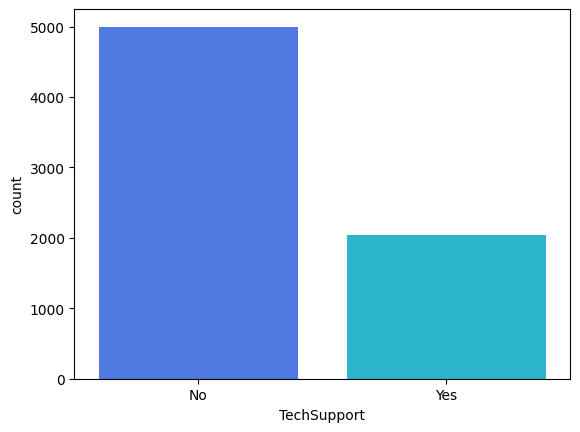

In [56]:
# displaying the error
df[df['TechSupport']=='No internet service'].head(3)

# Correcting the error 
df.loc[df['TechSupport']=='No internet service', 'TechSupport']='No'

# create the plot to display the corrected error
sns.countplot(x='TechSupport', data=df);

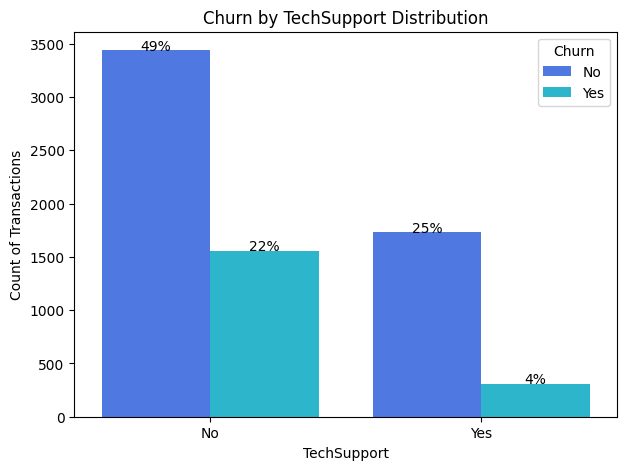

In [57]:
# Investigating churn by TechSupport distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.xlabel('TechSupport')
plt.ylabel('Count of Transactions')
plt.title('Churn by TechSupport Distribution')

# Add percentages to the bars
total_counts = len(df['TechSupport'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by TechSupport distribution chart above, subscribers without TechSupport have a higher churn rate at 22% compared to subscribers with TechSupport at 4%.

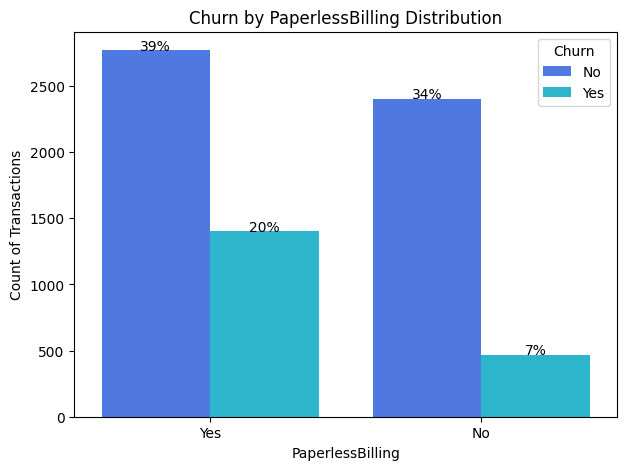

In [58]:
# Investigating churn by PaperlessBilling distribution.

# Create countplot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count of Transactions')
plt.title('Churn by PaperlessBilling Distribution')

# Add percentages to the bars
total_counts = len(df['PaperlessBilling'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In the Churn by PaperlessBilling distribution chart above, subscribers with PaperlessBilling have a higher churn rate at 20% compared to subscribers without PaperlessBilling at 7%.

### Bivariate Data Analysis

In [59]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'SeniorCitizen_Group'],
      dtype='object')

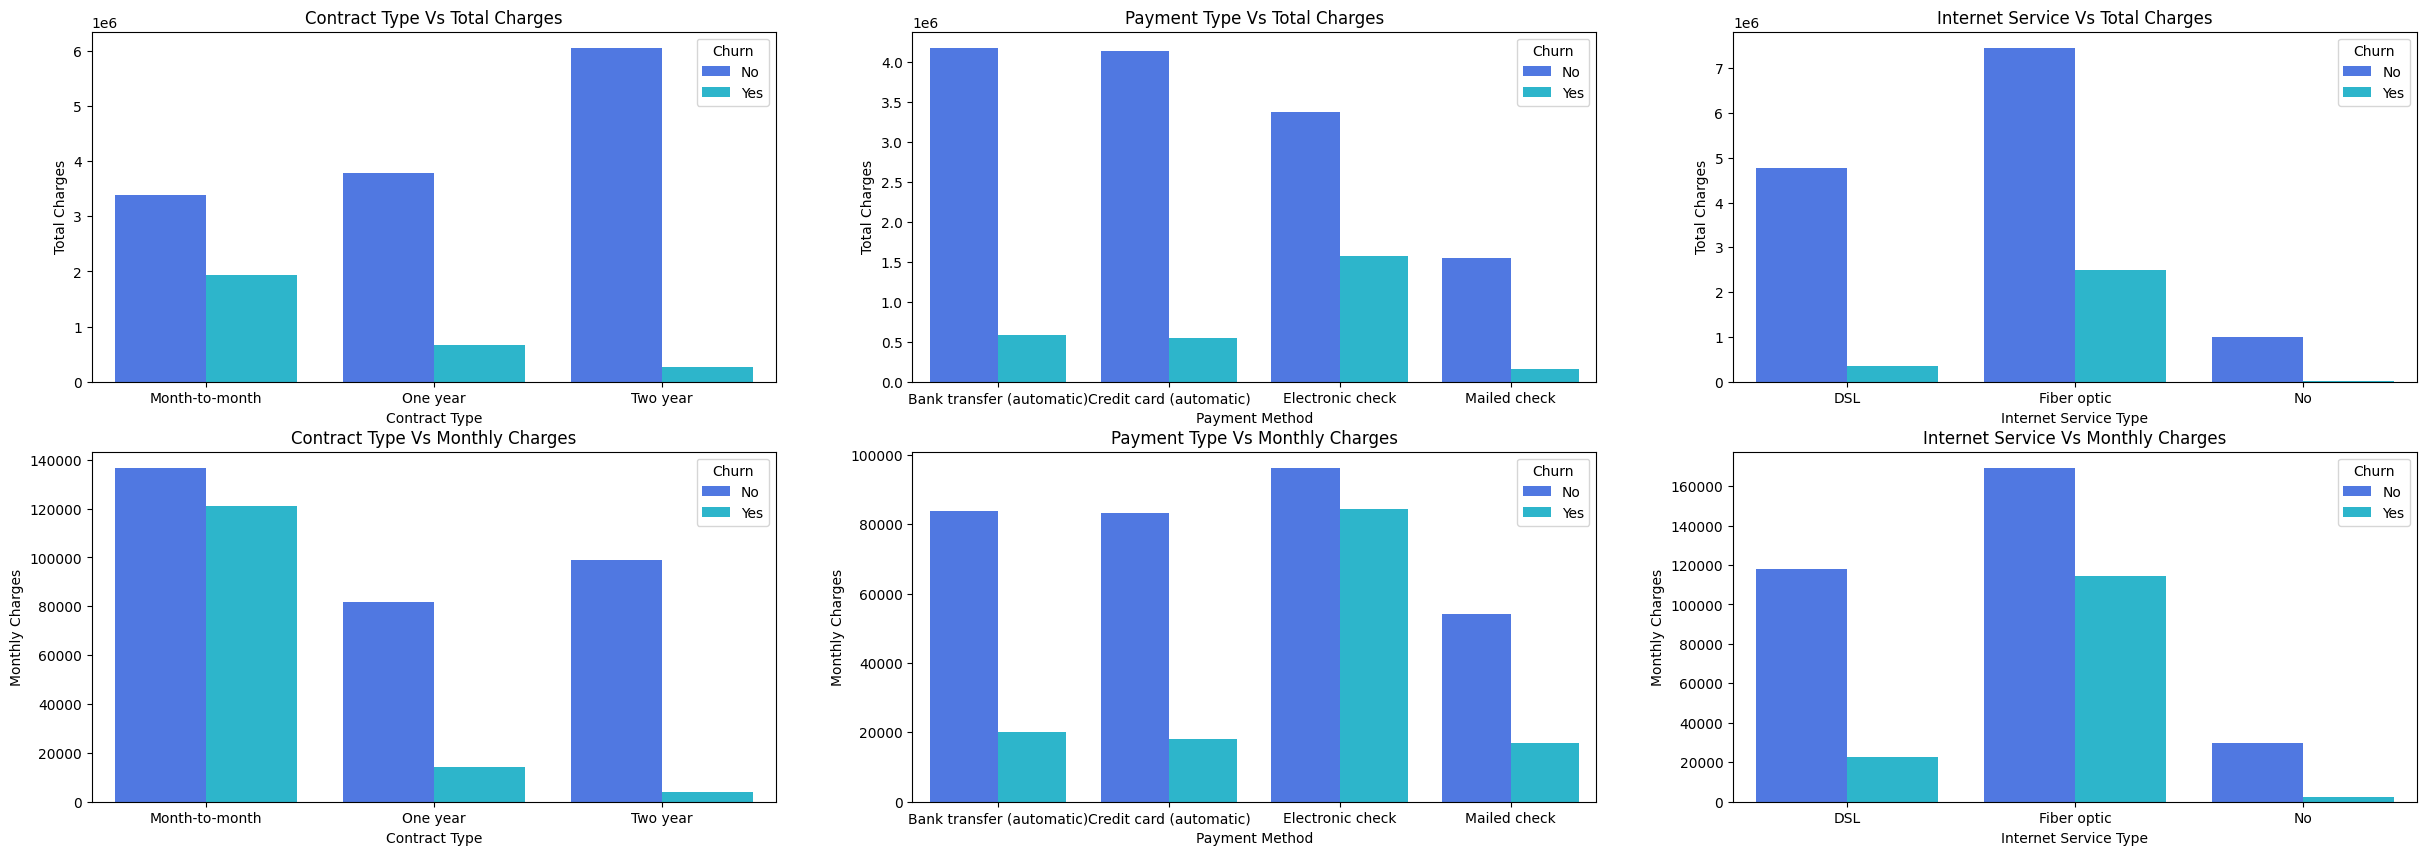

In [60]:
# Relationship between Contract Type & Total Transactions by Churn.
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))

# Group by Contract and calculate TotalCharges
contract_type_tcharge = df.groupby(['Contract', 'Churn'])['TotalCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=contract_type_tcharge, x='Contract', y='TotalCharges', hue='Churn', ax=axs[0, 0])

# Customize the plot
axs[0, 0].set_title("Contract Type Vs Total Charges")
axs[0, 0].set_xlabel('Contract Type')
axs[0, 0].set_ylabel('Total Charges')

# Add a legend
axs[0, 0].legend(title='Churn', loc='upper right')

# Relationship between Payment Method & Total Transactions by Churn.

# Group by PaymentMethod and calculate TotalCharges
payment_meth_tcharge = df.groupby(['PaymentMethod', 'Churn'])['TotalCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=payment_meth_tcharge, x='PaymentMethod', y='TotalCharges', hue='Churn', ax=axs[0, 1])

# Customize the plot
axs[0, 1].set_title("Payment Type Vs Total Charges")
axs[0, 1].set_xlabel('Payment Method')
axs[0, 1].set_ylabel('Total Charges')

# Add a legend
axs[0, 1].legend(title='Churn', loc='upper right')


# Relationship between Internet Service & Total Transactions by Churn.

# Group by Internet Service and calculate TotalCharges
internetservice_tcharge = df.groupby(['InternetService', 'Churn'])['TotalCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=internetservice_tcharge, x='InternetService', y='TotalCharges', hue='Churn', ax=axs[0, 2])

# Customize the plot
axs[0, 2].set_title("Internet Service Vs Total Charges")
axs[0, 2].set_xlabel('Internet Service Type')
axs[0, 2].set_ylabel('Total Charges')

# Add a legend
axs[0, 2].legend(title='Churn', loc='upper right')

# Relationship between Contract Type & Monthly Transactions by Churn.

# Group by Contract and calculate TotalCharges
contract_type_mcharge = df.groupby(['Contract', 'Churn'])['MonthlyCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=contract_type_mcharge, x='Contract', y='MonthlyCharges', hue='Churn', ax=axs[1, 0])

# Customize the plot
axs[1, 0].set_title("Contract Type Vs Monthly Charges")
axs[1, 0].set_xlabel('Contract Type')
axs[1, 0].set_ylabel('Monthly Charges')

# Add a legend
axs[1, 0].legend(title='Churn', loc='upper right')

# Relationship between Payment Method & Monthly Transactions by Churn.

# Group by PaymentMethod and calculate TotalCharges
payment_meth_mcharge = df.groupby(['PaymentMethod', 'Churn'])['MonthlyCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=payment_meth_mcharge, x='PaymentMethod', y='MonthlyCharges', hue='Churn', ax=axs[1, 1])

# Customize the plot
axs[1, 1].set_title("Payment Type Vs Monthly Charges")
axs[1, 1].set_xlabel('Payment Method')
axs[1, 1].set_ylabel('Monthly Charges')

# Add a legend
axs[1, 1].legend(title='Churn', loc='upper right')

# Relationship between Internet Service & Monthly Transactions by Churn.

# Group by Internet Service and calculate TotalCharges
internetservice_mcharge = df.groupby(['InternetService', 'Churn'])['MonthlyCharges'].sum().reset_index()

# Create a barplot with 'Churn' as hue
sns.barplot(data=internetservice_mcharge, x='InternetService', y='MonthlyCharges', hue='Churn', ax=axs[1, 2])

# Customize the plot
axs[1, 2].set_title("Internet Service Vs Monthly Charges")
axs[1, 2].set_xlabel('Internet Service Type')
axs[1, 2].set_ylabel('Monthly Charges')

# Add a legend
axs[1, 2].legend(title='Churn', loc='upper right')

plt.show();   

The chart above shows the bi-variate relationship between the TotalCharges feature with Contract Type, Payment Type and Internet Service by Churn in the upper half and the MonthlyCharges feature with Contract Type, Payment Type and Internet Service by Churn in the lower half.

Upper Half:

Churn by Contract Type Vs TotalCharges shows the Month-to-Month contract type has the highest churn rate followed by the one-year contract type while the two-year contract type has the least. 

Churn by Payment type Vs TotalCharges shows the Electronic Check option has the highest churn rate. 

Churn by Internet Service Vs TotalCharges shows the Fibre Optic channel has the highest churn rate. 

Lower Half:

Churn by Contract Type Vs MonthlyCharges shows the Month-to-Month contract type has the highest churn rate followed by the one-year contract type while the two-year contract type has the least. 

Churn by Payment type Vs MonthlyCharges shows the Electronic Check option has the highest churn rate. 

Churn by Internet Service Vs MonthlyCharges shows the Fibre Optic channel has the highest churn rate. 


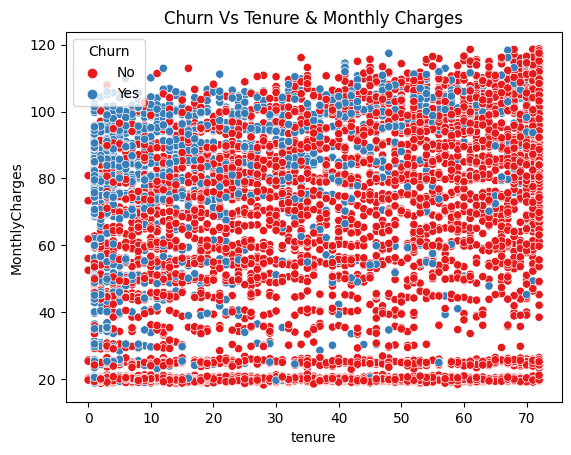

In [61]:
# Visualizing the relationship between Tenure & Monthly Charges by Churn

# Create a scatterplot with 'MonthlyCharges' on the y-axis and 'tenure' on the x-axis, with 'Churn' as hue
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', palette='Set1')

# Customize the plot
plt.title("Churn Vs Tenure & Monthly Charges")

plt.show();


More subscribers who pay higher monthly charges in the first few years of loyalty are churning more than subscribers who have stayed longer. 

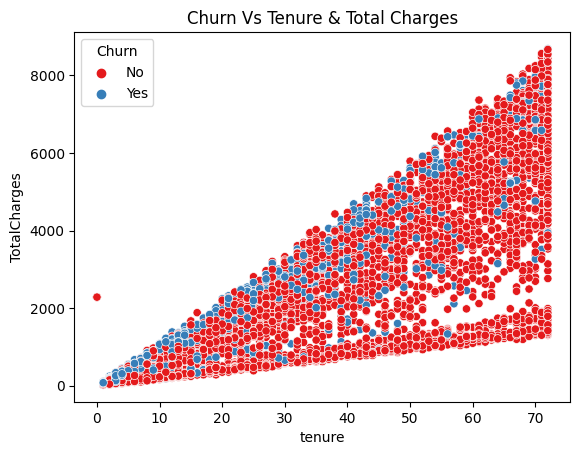

In [62]:
# Visualizing the relationship between Tenure & Monthly Charges by Churn

# Create a scatterplot with 'TotalCharges' on the y-axis and 'tenure' on the x-axis, with 'Churn' as hue
sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn', palette='Set1')

# Customize the plot
plt.title("Churn Vs Tenure & Total Charges")

plt.show();

The chart above reveals that subscribers who pay the most in totalcharges in each year of loyalty churn the most except for subscribers with a longevity period of over 60 years.

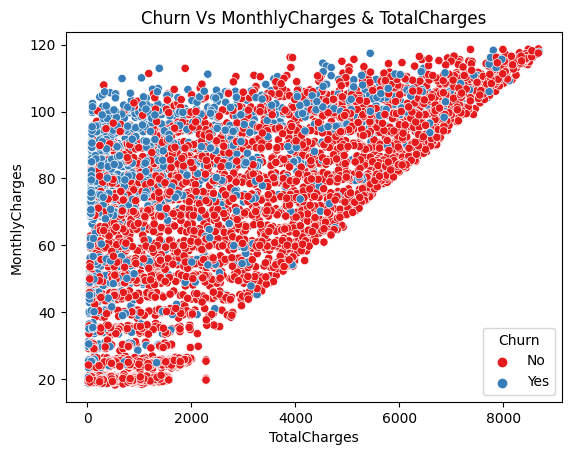

In [63]:
# Visualizing the relationship between Monthly & Total Charges by Churn

# Create a scatterplot with 'MonthlyCharges' on the x-axis and 'TotalCharges' on the y-axis, with 'Churn' as hue
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df, hue='Churn', palette='Set1')

# Customize the plot
plt.title("Churn Vs MonthlyCharges & TotalCharges")

plt.show();


The chart above reveals the relationship between monthly and total charges by churn. It shows that Connecttel subscribers on higher monthly charges are more likely to churn compared to subscribers on lower monthly charges while in terms of total charges, subscribers on the lower end of the spectrum are more likely to churn compared to subscribers at the higher end. This is in sync with the distribution of both monthly & total charges by churn earlier analyzed. 

In [64]:
# Function that groups the Tenure feature into various customer loyalty groups. 

def loyalty (x):
    if x <= 5:
        return '0-5yrs'
    elif x <= 10:
        return '6-10yrs'
    elif x <= 15:
        return '11-15yrs'
    elif x <= 20:
        return '16-20yrs'
    elif x <= 25:
        return '21-25yrs'
    elif x <= 30:
        return '26-30yrs'
    elif x <= 35:
        return '31-35yrs'
    elif x <= 40:
        return '36-40yrs'
    elif x <= 45:
        return '41-45yrs'
    elif x <= 50:
        return '46-50yrs'
    elif x <= 55:
        return '51-55yrs'
    elif x <= 60:
        return '56-60yrs'
    elif x <= 65:
        return '61-65yrs'
    elif x <= 70:
        return '66-70yrs'
    else:
        return '70+ yrs'

# Creates new feature Tenure Group.
df['Tenure_Group']=df['tenure'].apply(loyalty)

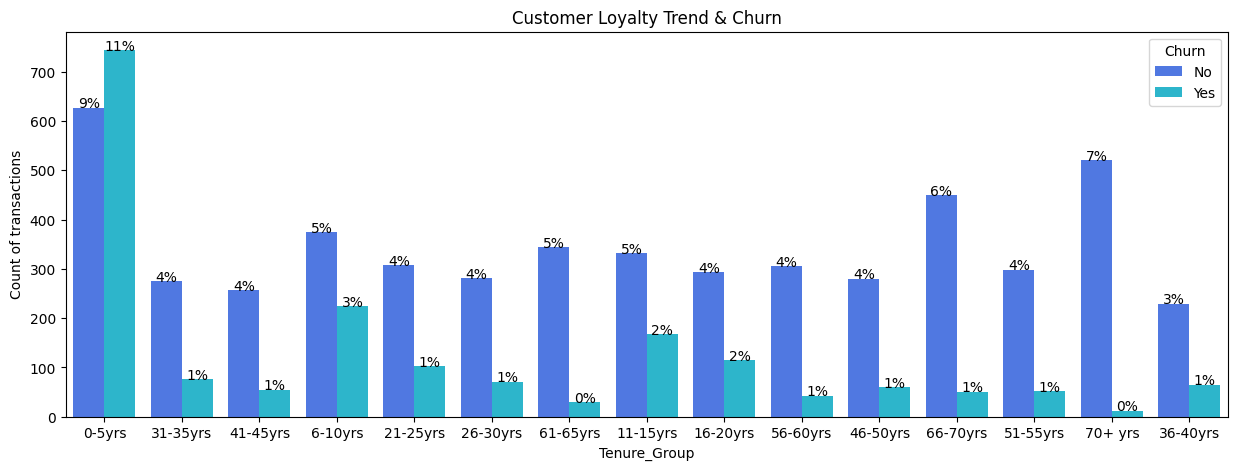

In [65]:
# Investigating the relationship between longevity of customer & churn. 

# Create countplot
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='Tenure_Group', data=df, hue='Churn')
plt.xlabel('Tenure_Group')
plt.ylabel('Count of transactions')
plt.title('Customer Loyalty Trend & Churn')

# Add percentages to the bars
total_counts = len(df['Tenure_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.0%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

The chart reveals Connecttel’s customer loyalty trend over time.  Subscribers within the first five years  are at the most risk of dropping-off or cancelling their subscriptions with the highest churn rate of 11%. The churn rate amongst other customer loyalty groups over time were insignificantly low at less than 3%. 


### Multivariate Data Analysis

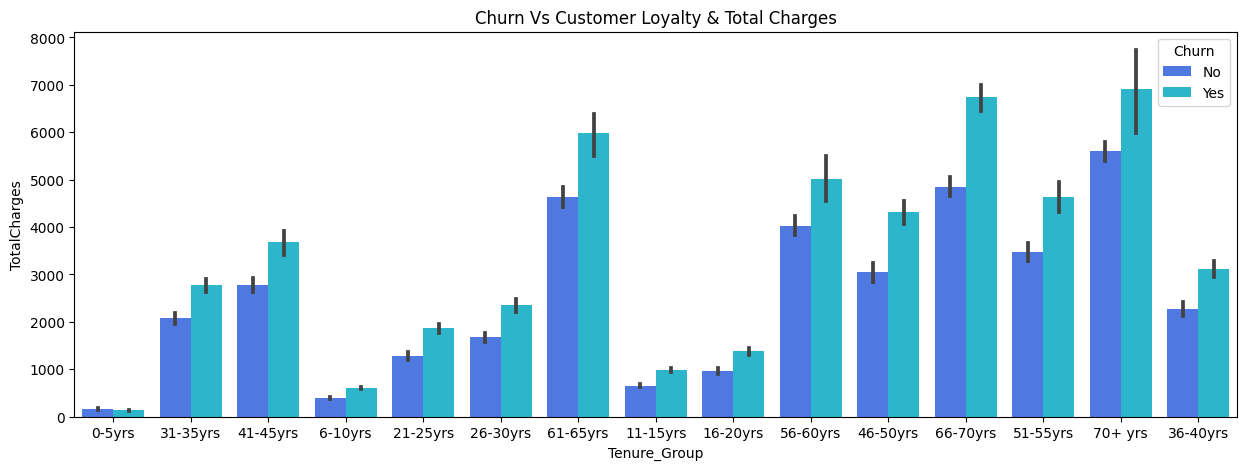

In [66]:
# Relationship between Customer Loyalty, Total charges and Churn.
plt.figure(figsize=(15,5))
sns.barplot(x='Tenure_Group', y='TotalCharges', data=df, hue='Churn')
plt.title("Churn Vs Customer Loyalty & Total Charges");

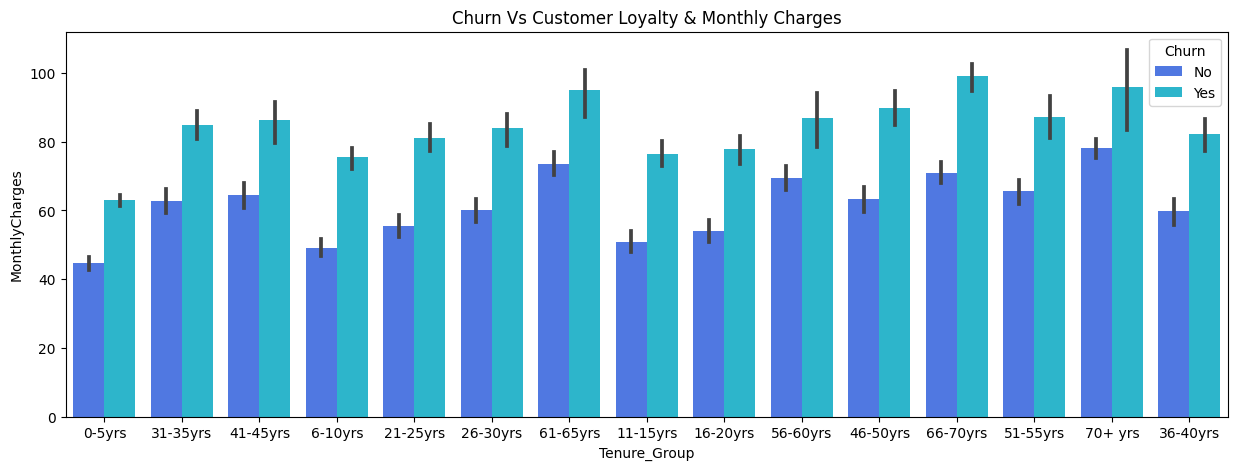

In [67]:
# Relationship between Customer Loyalty, Monthly charges and Churn.
plt.figure(figsize=(15,5))
sns.barplot(x='Tenure_Group', y='MonthlyCharges', data=df, hue='Churn')
plt.title("Churn Vs Customer Loyalty & Monthly Charges");

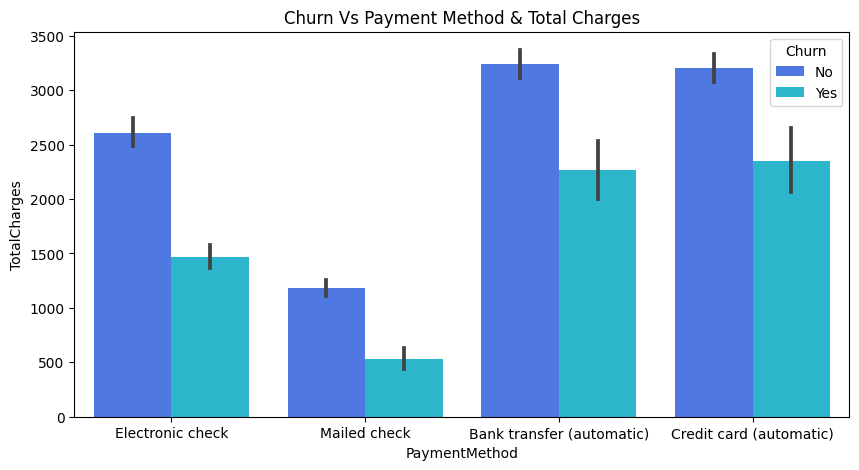

In [68]:
# Relationship between Payment Method, Total charges and Churn.
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod', y='TotalCharges', data=df, hue='Churn')
plt.title("Churn Vs Payment Method & Total Charges");

The chart reveals the bivariate relationship between payment method & total charges by churn. Subscribers who use both automatic channels (bank transfer & credit card) churn at a higher rate than subscribers who use the check payment methods

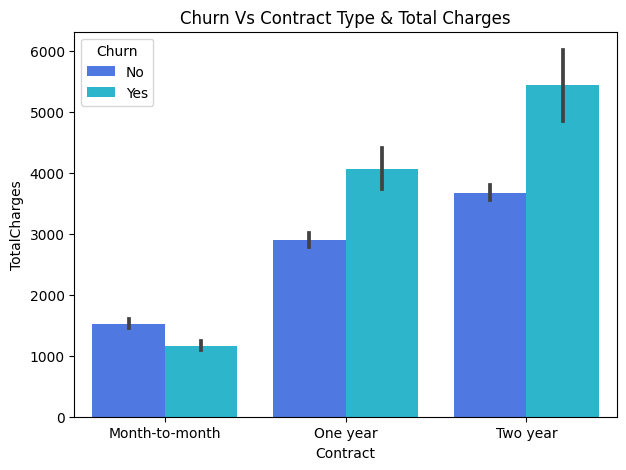

In [69]:
# Relationship between Contract Type, Total charges and Churn.
plt.figure(figsize=(7,5))
sns.barplot(x='Contract', y='TotalCharges', data=df, hue='Churn')
plt.title("Churn Vs Contract Type & Total Charges");

The chart reveals the bivariate relationship between contract type & total charges by churn. Subscribers who are signed on the two-year contract type are churning the most followed by subscribers signed on the one-year contract type while the least churned are subscribers on the month-to-month contract type. Notice that churned subcribers in both the one-year and two-year plans are more than their respective active subscribers. 

In summary, in context of total charges the longer the contract type the more likely a subscriber will churn. 


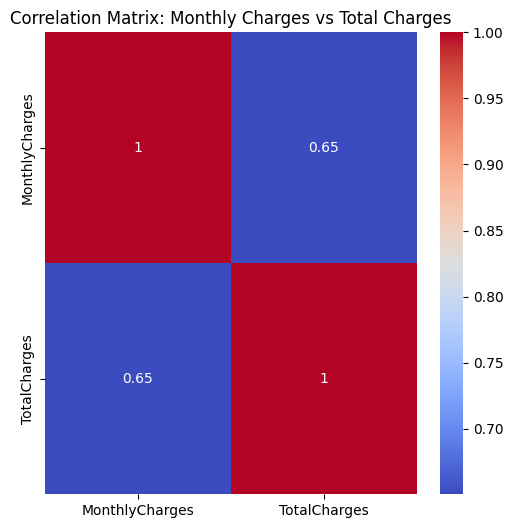

In [70]:
# Correlation Analysis
correlation_matrix = df[['MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Monthly Charges vs Total Charges")
plt.show();

The chart above show a correlation matrix between the MonthlyCharges & TotalCharges features. We can see that both have a linear relationship with a strong positive relationship between both features.

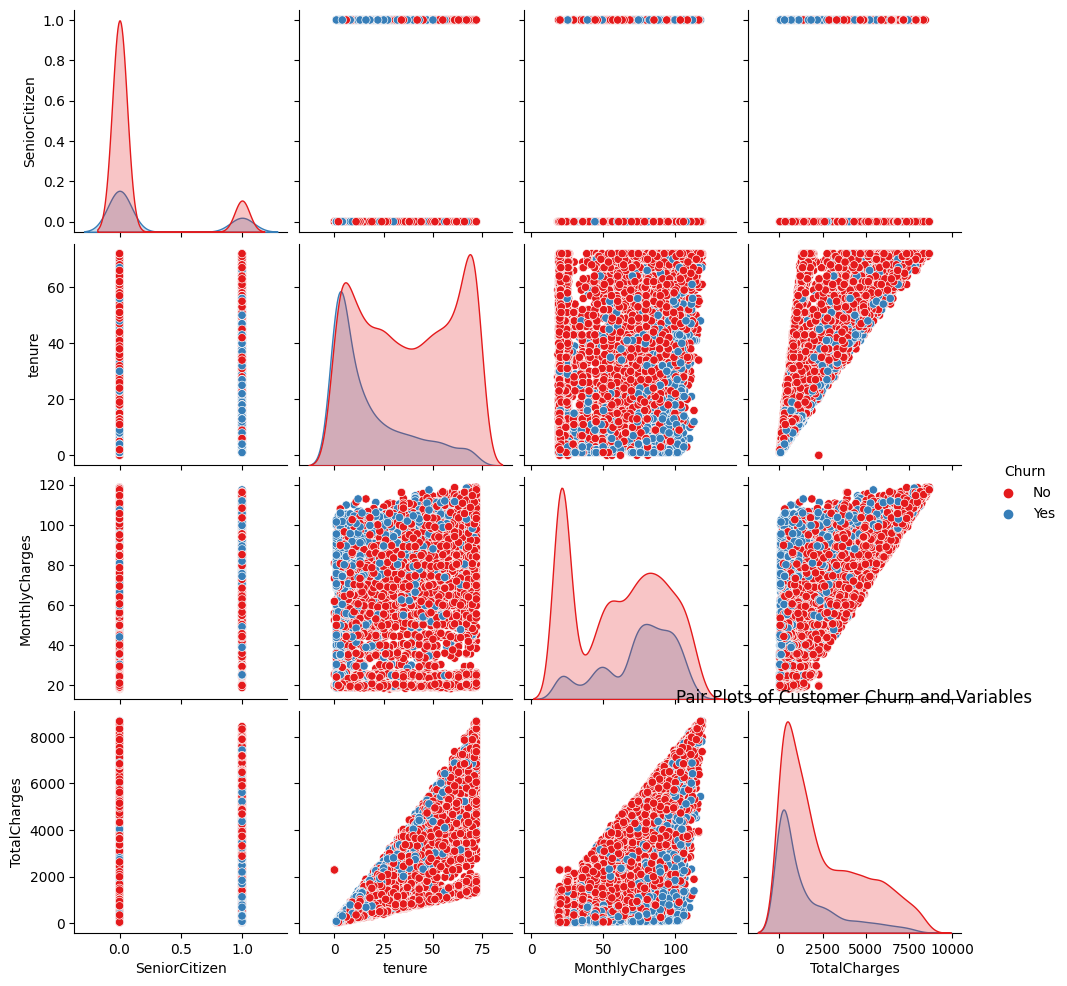

In [71]:
import seaborn as sns

# Assuming you have a DataFrame named 'df' containing your data
sns.pairplot(df, hue='Churn', palette='Set1')
plt.title("Pair Plots of Customer Churn and Variables")
plt.show();


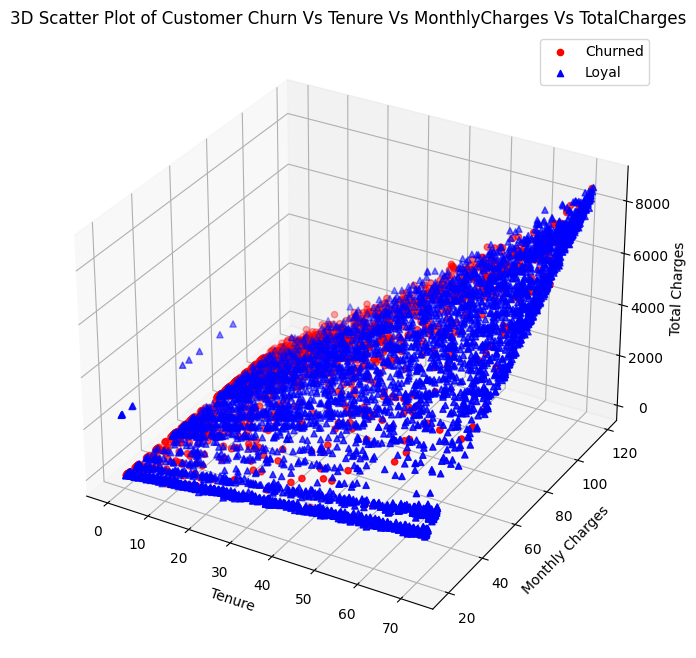

In [74]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D frame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assigning yes to churn and no=not churned to loyal
churned = df[df['Churn'] == 'Yes']
loyal = df[df['Churn'] == 'No']

ax.scatter(churned['tenure'], churned['MonthlyCharges'], churned['TotalCharges'], c='r', marker='o', label='Churned')
ax.scatter(loyal['tenure'], loyal['MonthlyCharges'], loyal['TotalCharges'], c='b', marker='^', label='Loyal')

ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')

plt.title("3D Scatter Plot of Customer Churn Vs Tenure Vs MonthlyCharges Vs TotalCharges")
plt.legend()
plt.show();


This 3D scatterplot reveals the relationship of customer loyalty trend, monthly and total charges. It shows subscribers on high monthly charges in the first few years of on-boarding churn more compared to other years. 

## Feature Engineering 

In [75]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'SeniorCitizen_Group', 'Tenure_Group'],
      dtype='object')

In [76]:
# function to convert target feature into 1 and 0 and create a new feature - Churn-Type

def attrition(x):
    if x == 'Yes':
        return 0
    else:
        return 1

# Apply the function in Churn feature
df['Churn_Type']=df['Churn'].apply(attrition)
    

I used the attrition function to perform a feature construction by creating a new feature called - Churn_Type and converting the variables from object to numeric datatype. Also, I adopted a binary positive labelling scheme to label the outcomes as 0 for Churn and 1 for Not Churn. 

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Group,Tenure_Group,Churn_Type
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Not Senior Citizen,0-5yrs,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Not Senior Citizen,31-35yrs,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Not Senior Citizen,0-5yrs,0
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Not Senior Citizen,41-45yrs,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Not Senior Citizen,0-5yrs,0


In [79]:
# Create a deep copy of df1 and assign it to df2
df2 = df.copy()

# Now, df2 is a separate DataFrame with the same data as df1


In [81]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Group,Tenure_Group,Churn_Type
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Not Senior Citizen,0-5yrs,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Not Senior Citizen,31-35yrs,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Not Senior Citizen,0-5yrs,0
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Not Senior Citizen,41-45yrs,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Not Senior Citizen,0-5yrs,0


In [82]:
df2.dtypes

customerID              object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
tenure                   int64
PhoneService            object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies         object
Contract                object
PaperlessBilling        object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                   object
SeniorCitizen_Group     object
Tenure_Group            object
Churn_Type               int64
dtype: object

In [83]:
# Segment the dataframe into target_label
target_label=df2[['Churn_Type']]

In [84]:
target_label.head()

,Churn_Type
0,1
1,1
2,0
3,1
4,0


In [85]:
df2.dtypes

customerID              object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
tenure                   int64
PhoneService            object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies         object
Contract                object
PaperlessBilling        object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                   object
SeniorCitizen_Group     object
Tenure_Group            object
Churn_Type               int64
dtype: object

In [86]:
# Select only relevant features required to train my model and store in a new dataframe (df3). Drop-off irrelevant categorical columns used for earlier visualization.
df3=df2[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

Performed a feature extraction by dropping-off irrelevant features which include CustomerID, Churn, SeniorCitizen_Group, Tenure_Group and assigning the new dataframe as df3. The purpose is to ensure my model performs optimally and it's as accurate as possible. 

In [87]:
df3.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [88]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [89]:
# Label Encoding 

# Function to convert all categorical features in the dataset to numerical values. 
from sklearn.preprocessing import LabelEncoder

# Method initialization
encoder=LabelEncoder()

# Looping for columns except survived 
for c in df3.columns [0:]:
    if (df3[c].dtype=='object'):
        df3[c]=encoder.fit_transform(df3[c])
    else:
        df3[c]=df3[c]

In [90]:
df3.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [91]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [92]:
df3.shape

(7043, 19)

In [93]:
# Normalizing or standardizing the features in the dataset.

from sklearn.preprocessing import MinMaxScaler
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
df3['Scaled_MC']=scaler.fit_transform(df3[['MonthlyCharges']].values.reshape(-1,1))
df3['Scaled_TC']=scaler.fit_transform(df3[['TotalCharges']].values.reshape(-1,1))
df3['Scaled_Tenure']=scaler.fit_transform(df3[['tenure']].values.reshape(-1,1))


''' Drop-off the irrelevant features '''
df3.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)

df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0.013889
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0.472222
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,0.027778
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0.625000
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,0.027778


Performing feature scaling on the MonthlyCharges, TotalCharges and tenure features by normalizing them inorder to avoid biases towards higher variables and improve performance of my ML model.

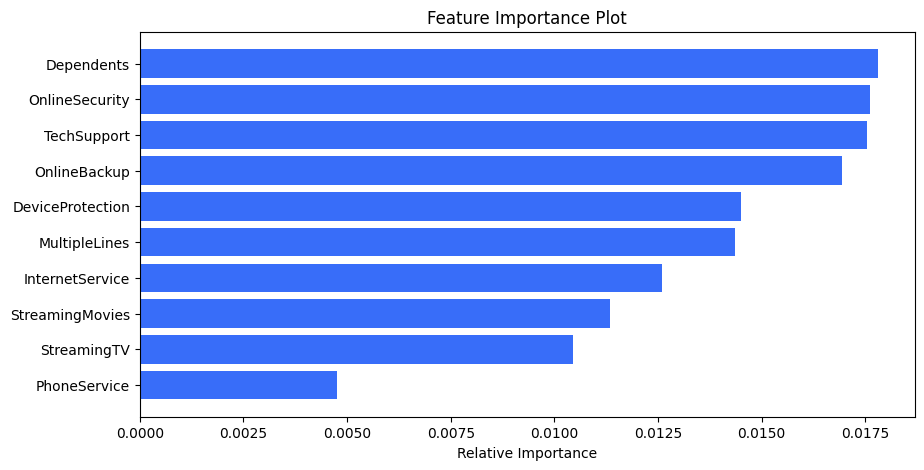

In [94]:
# Checking for the important features to the target variable 

from sklearn.ensemble import RandomForestRegressor

feat_im=RandomForestRegressor()
feat_im.fit(df3, target_label)
feat_name=list(df3.columns)
importances=feat_im.feature_importances_
indices=np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), [feat_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance Plot');

The above features ranked in the order of importance are the most relevant features in the dataframe which determines the outcome of the target variable. In this context, there determine whether a Connecttel subscriber will churn or not. 

## Data Splitting

In [95]:
# Split the dataset into both training and test datasets. 

x_train, x_test, y_train, y_test = train_test_split(df3, target_label, test_size=0.2, random_state=42) 

In [96]:
# Shape of the dataset
df3.shape

(7043, 19)

In [97]:
# Shape of the target feature 
target_label.shape

(7043, 1)

In [98]:
x_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
2142,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,3,0.463682,0.152089,0.291667
1623,0,0,0,0,1,1,1,0,1,0,0,1,1,2,1,0,0.785572,0.589736,0.750000
6074,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0.051741,0.000537,0.013889


In [99]:
y_train.head(3)

,Churn_Type
2142,1
1623,1
6074,0


In [100]:
target_label.head(6)

,Churn_Type
0,1
1,1
2,0
3,1
4,0
5,0


In [101]:
x_test.head(6)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_MC,Scaled_TC,Scaled_Tenure
185,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0.065174,0.000692,0.013889
2715,1,0,0,0,1,1,2,0,0,0,0,0,0,0,1,0,0.069652,0.112814,0.569444
3825,0,0,1,1,1,0,2,0,0,0,0,0,0,2,0,3,0.010945,0.116882,0.722222
1807,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0.578109,0.006641,0.013889
132,1,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0.321393,0.374025,0.930556
1263,0,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0.709950,0.704916,0.944444


In [102]:
y_test.head(6)

,Churn_Type
185,0
2715,1
3825,1
1807,0
132,1
1263,0


## Model Selection

In [103]:
# Building a Logistic Regression Model
logreg=LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

# Predict the model
ly_pred=logreg.predict(x_test)

# Evaluate the model. 
print("Logistic Regression Model")
print()
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression Model

Accuracy: 0.8168914123491838
Precision: 0.8562271062271062
Recall: 0.9025096525096525
F1-Score: 0.8787593984962406
AUC-ROC: 0.7407990621797592


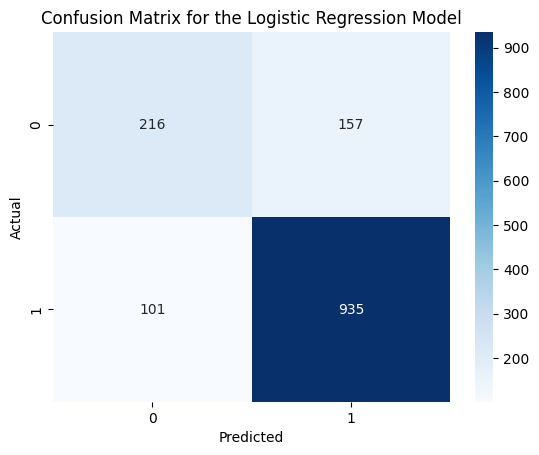

In [104]:
# Building a Confusion Matrix for the Logistic Regression Model
lcm=confusion_matrix(y_test, ly_pred)

#Visualize the Confusion Matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show();

In [105]:
# Building a Random Forest Classifier Model
rfc=RandomForestClassifier()

# Train the model
rfc.fit(x_train, y_train)

# Predict the model
rfc_pred=rfc.predict(x_test)

# Evaluate the model
print("Random Forest Model")
print()
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Precision:", precision_score(y_test, rfc_pred))
print("Recall:", recall_score(y_test, rfc_pred))
print("F1-Score:", f1_score(y_test, rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest Model

Accuracy: 0.7963094393186657
Precision: 0.8270742358078602
Recall: 0.9140926640926641
F1-Score: 0.868408986703347
AUC-ROC: 0.6916307824484769


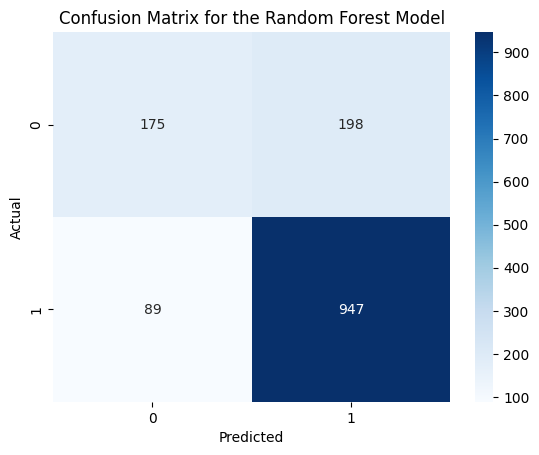

In [106]:
# Building a Confusion Matrix for the Random Forest Classifier 
rcm=confusion_matrix(y_test, rfc_pred)

#Visualize the Confusion Matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Random Forest Model')
plt.show();

In [107]:
# Building a XGBClassifier Model
xgb=XGBClassifier()

# Train the model
xgb.fit(x_train, y_train)

# Predict the model
xgb_pred=xgb.predict(x_test)

# Evaluate the model
print("XGBClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1-Score:", f1_score(y_test, xgb_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

XGBClassifier Model

Accuracy: 0.794180269694819
Precision: 0.8366425992779783
Recall: 0.8947876447876448
F1-Score: 0.8647388059701493
AUC-ROC: 0.7047664765493185


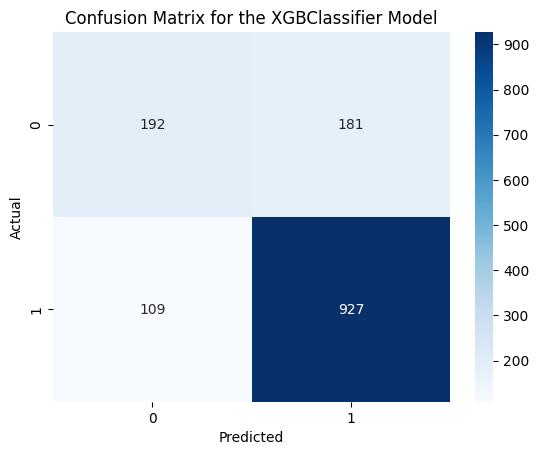

In [108]:
# Building a Confusion Matrix for the XGBClassifier Classifier 
xgbc=confusion_matrix(y_test, xgb_pred)

#Visualize the Confusion Matrix
sns.heatmap(xgbc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the XGBClassifier Model')
plt.show();

In [109]:
# Building a Naive Baye Classifier Model
nb=GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Predict the model
nb_pred=nb.predict(x_test)

# Evaluate the model
print("Naive Baye Model")
print()
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-Score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Baye Model

Accuracy: 0.7629524485450674
Precision: 0.8970588235294118
Recall: 0.7654440154440154
F1-Score: 0.8260416666666668
AUC-ROC: 0.7607380935128925


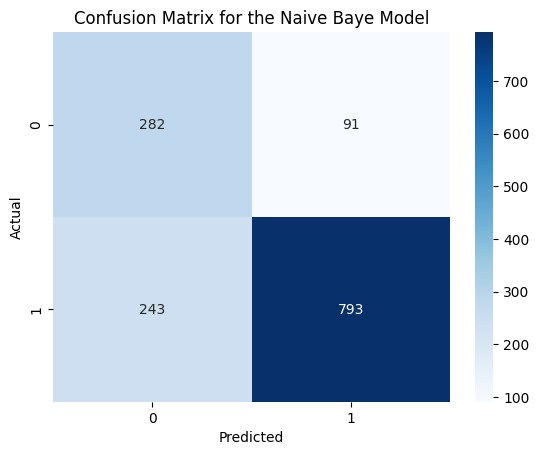

In [110]:
# Building a Confusion Matrix for the Naive Baye Classifier 
nbc=confusion_matrix(y_test, nb_pred)

#Visualize the Confusion Matrix
sns.heatmap(nbc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Naive Baye Model')
plt.show();

In [112]:
# Building a  SGDClassifier Model
sgdc=SGDClassifier()

# Train the model
sgdc.fit(x_train, y_train)

# Predict the model
sgdc_pred=sgdc.predict(x_test)

# Evaluate the model. 
print("SGDClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, sgdc_pred))
print("Precision:", precision_score(y_test, sgdc_pred))
print("Recall:", recall_score(y_test, sgdc_pred))
print("F1-Score:", f1_score(y_test, sgdc_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgdc_pred))

SGDClassifier Model

Accuracy: 0.7835344215755855
Precision: 0.7857701329163409
Recall: 0.9700772200772201
F1-Score: 0.8682505399568035
AUC-ROC: 0.6177463848375376


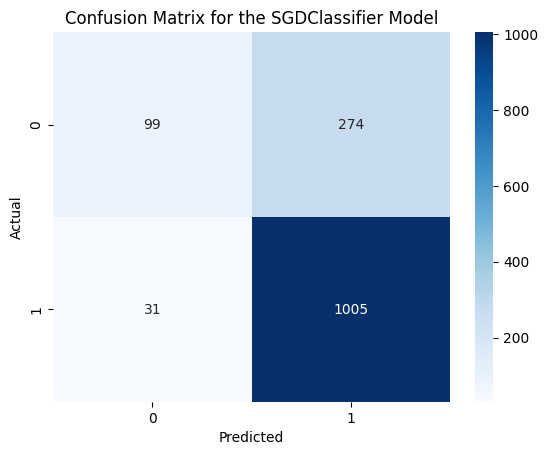

In [113]:
# Building a Confusion Matrix for the SGDClassifier Model
sgdcm=confusion_matrix(y_test, sgdc_pred)

#Visualize the Confusion Matrix
sns.heatmap(sgdcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the SGDClassifier Model')
plt.show();

In [114]:
# Building a  KNeighborsClassifier Model
kb=KNeighborsClassifier()

# Train the model
kb.fit(x_train, y_train)

# Predict the model
kb_pred=kb.predict(x_test)

# Evaluate the model. 
print("KNeighborsClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, kb_pred))
print("Precision:", precision_score(y_test, kb_pred))
print("Recall:", recall_score(y_test, kb_pred))
print("F1-Score:", f1_score(y_test, kb_pred))
print("AUC-ROC:", roc_auc_score(y_test, kb_pred))

KNeighborsClassifier Model

Accuracy: 0.759403832505323
Precision: 0.8303317535545024
Recall: 0.8455598455598455
F1-Score: 0.8378766140602583
AUC-ROC: 0.6828335420828718


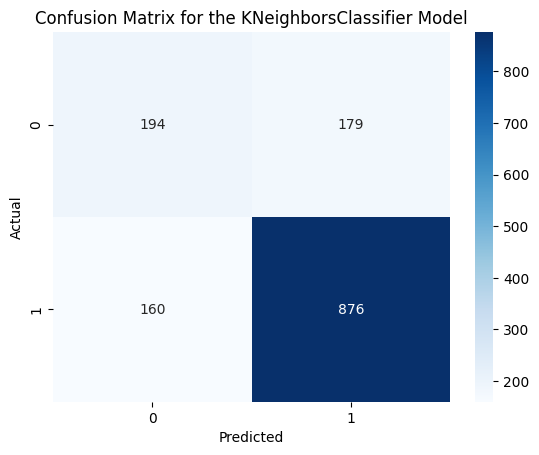

In [115]:
# Building a Confusion Matrix for the KNeighborsClassifier Model
kbcm=confusion_matrix(y_test, kb_pred)

#Visualize the Confusion Matrix
sns.heatmap(kbcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the KNeighborsClassifier Model')
plt.show();

In [116]:
# Building a DecisionTreeClassifier Model
DT=DecisionTreeClassifier()

# Train the model
DT.fit(x_train, y_train)

# Predict the model
DT_pred=DT.predict(x_test)

# Evaluate the model. 
print("DecisionTreeClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, DT_pred))
print("Precision:", precision_score(y_test, DT_pred))
print("Recall:", recall_score(y_test, DT_pred))
print("F1-Score:", f1_score(y_test, DT_pred))
print("AUC-ROC:", roc_auc_score(y_test, DT_pred))

DecisionTreeClassifier Model

Accuracy: 0.7416607523066004
Precision: 0.8249516441005803
Recall: 0.8233590733590733
F1-Score: 0.8241545893719807
AUC-ROC: 0.6690521908350326


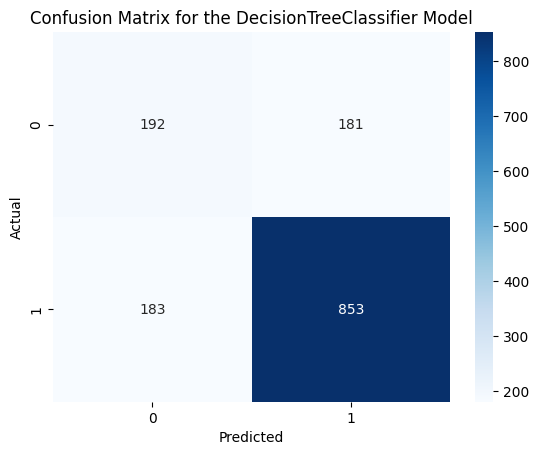

In [117]:
# Building a Confusion Matrix for the DecisionTreeClassifier Model
DTcm=confusion_matrix(y_test, DT_pred)

#Visualize the Confusion Matrix
sns.heatmap(DTcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the DecisionTreeClassifier Model')
plt.show();

In [118]:
# Building a SVC Model
sv=SVC()

# Train the model
sv.fit(x_train, y_train)

# Predict the model
sv_pred=sv.predict(x_test)

# Evaluate the model. 
print("SVC Model")
print()
print("Accuracy:", accuracy_score(y_test, sv_pred))
print("Precision:", precision_score(y_test, sv_pred))
print("Recall:", recall_score(y_test, sv_pred))
print("F1-Score:", f1_score(y_test, sv_pred))
print("AUC-ROC:", roc_auc_score(y_test, sv_pred))

SVC Model

Accuracy: 0.8161816891412349
Precision: 0.8441098317094774
Recall: 0.9198841698841699
F1-Score: 0.8803695150115473
AUC-ROC: 0.7240171519662137


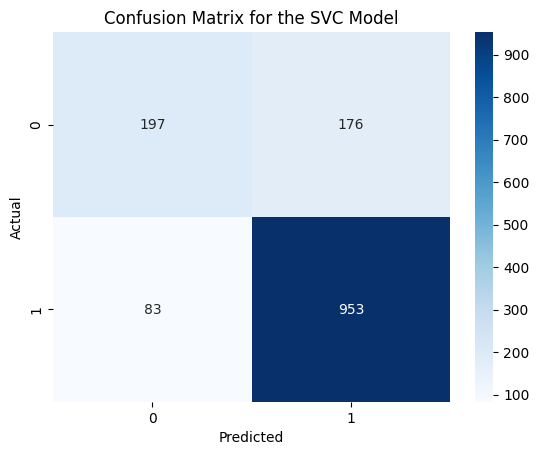

In [119]:
# Building a Confusion Matrix for the SVC Model
svcm=confusion_matrix(y_test, sv_pred)

#Visualize the Confusion Matrix
sns.heatmap(svcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the SVC Model')
plt.show();

In [120]:
# Building a LGBMClassifier Model

from lightgbm import LGBMClassifier
lb = LGBMClassifier()

# Train the model
lb.fit(x_train, y_train)

# Predict the model
lb_pred=lb.predict(x_test)

# Evaluate the model. 
print("LGBMClassifier Model")
print()
print("Accuracy:", accuracy_score(y_test, lb_pred))
print("Precision:", precision_score(y_test, lb_pred))
print("Recall:", recall_score(y_test, lb_pred))
print("F1-Score:", f1_score(y_test, lb_pred))
print("AUC-ROC:", roc_auc_score(y_test, lb_pred))

[LightGBM] [Info] Number of positive: 4138, number of negative: 1496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.734469 -> initscore=1.017418
[LightGBM] [Info] Start training from score 1.017418
LGBMClassifier Model

Accuracy: 0.7934705464868701
Precision: 0.8371040723981901
Recall: 0.8928571428571429
F1-Score: 0.8640822045773003
AUC-ROC: 0.705141708157794


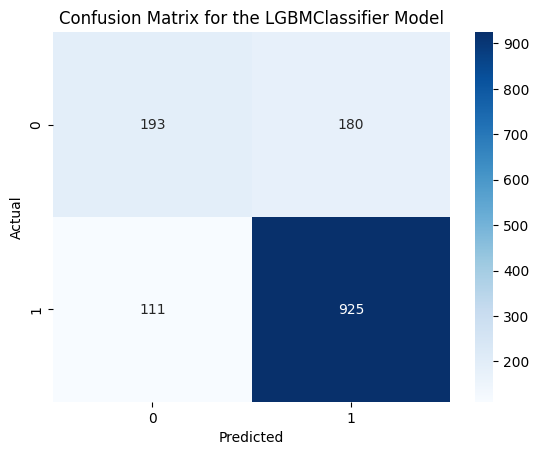

In [121]:
# Building a Confusion Matrix for the LGBMClassifier Model
lbcm=confusion_matrix(y_test, lb_pred)

#Visualize the Confusion Matrix
sns.heatmap(lbcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the LGBMClassifier Model')
plt.show();

## Model Interpretation

#### Model Selection:

I selected four(4) classifier models to enable me label and train the dataset. These models are as shown below:

1. Logistic Regression Model
2. Support Vector Classifier (SVC) Model
3. XGBClassifier Model
4. Light Gradient Boosting Model

To evaluate the performance of these models, the following metrics were employed:

1. Accuracy
2. Precision
3. Recall (Sensitivity or True Positive Rate)
4. F1-Score
5. AUC-ROC 

#### Interpretation of Model Evaluation Metrics

Accuracy: 

The models recorded an accuracy score as shown below:

1. Logistic Regression            : 0.8168
   
2. Support Vector Classsifier     : 0.8161

3. XGBClassifier                  : 0.7941

4. Light Gradient Boosting Model  : 0.7934

Clearly the Logistic Regression Model achieved the best score with an accuracy score of 0.8168 (82%). 

Precision (0.86 – 86%): 

Precision is the ratio of true positive predictions to the total positive predictions. In the context of customer churn prediction, this means that about 86% of the subscribers predicted as "not churn" are actually not churning. This is a good precision score, indicating that when the model predicts subscribers as "not churn," it is often correct.

Recall (0.90 – 90%): 

Recall (also called sensitivity) is the ratio of true positive predictions to the total actual positives. In this case, it means that the model is capturing approximately 90% of the actual churn cases. This is a strong recall score, indicating that the model is effective at identifying customers who are likely to churn.

F1-Score (0.87 – 87%): 

The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. An F1-score of 87% is quite good and suggests that the model achieves a good balance between precision and recall.

AUC-ROC (0.74 – 74%): 

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to distinguish between positive and negative cases across different probability thresholds. An AUC-ROC of 74% is very good. Ideally, one would want the ROC curve to be closer to the top-left corner (AUC-ROC closer to 1) for better discrimination.

Given these metrics, it's clear that the model is performing well in terms of precision and recall, which are crucial for a customer churn prediction problem. However, there's potential for improvement in terms of the ROC AUC score, which indicates the model's ability to rank predictions correctly.

### In Conclusion

In the context of the business's objective to reduce customer attrition, enhance customer loyalty, and maintain a top edge in its industry, it's advisable to prioritize minimizing false negatives (Type II errors).

This is because:

1.	Customer Retention and Loyalty: Minimizing false negatives means identifying as many customers at risk of churning as possible. By doing so, the business can proactively engage with these customers, provide personalized attention, and offer retention strategies to keep them loyal. This approach aligns with the goal of reducing customer attrition and enhancing loyalty.

2.	Competitive Advantage: In highly competitive industries, maintaining a top edge often relies on retaining existing customers and preventing them from switching to competitors. Identifying and addressing potential churners early can help the business stay ahead of the competition.

3.	Customer Satisfaction: By actively reaching out to customers who may be considering leaving, the business demonstrates its commitment to customer satisfaction. This proactive approach can lead to a positive customer experience and increased loyalty.

4.	Revenue Retention: Reducing customer attrition directly impacts revenue retention. It's generally more cost-effective to retain existing customers than to acquire new ones. Minimizing false negatives ensures that the business retains as many valuable customers as possible.

5.	Long-Term Strategy: Customer loyalty and reduced attrition are typically long-term objectives. Prioritizing false negative minimization sets the foundation for building lasting customer relationships and sustained growth.

While minimizing false negatives is essential for achieving these objectives, it's also important to maintain a balance by considering factors such as cost-effectiveness and resource allocation. Connecttel can set a confidence threshold for churn predictions to ensure that efforts are focused on customers who are most likely to churn while avoiding excessive retention costs. Regular monitoring and adjustment of this threshold can help strike the right balance between precision and recall to achieve the desired outcomes.